In [1]:
import winconv as wc
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)

(0.8660254037844387, 6.123233995736766e-17, -0.8660254037844387, -0.8660254037844386)


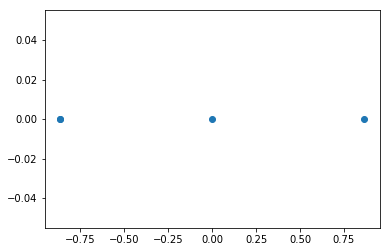

In [2]:
m = 2
r = 3

k = np.arange(1, m+r, dtype=np.float64)

cheb_nodes = np.cos((2*k-1)/(2*r)*np.pi)
plt.plot(cheb_nodes, 0*cheb_nodes, "o")

pts = tuple(cheb_nodes)
print(pts)

In [3]:
AT,G,BT,f = wc.cookToomFilter(pts,m,r)

AT2 = np.array(AT).astype(np.float64)
G2 = np.array(G).astype(np.float64)
BT2 = np.array(BT).astype(np.float64)

### Formula for 1D Winograd
    
$$Y = A^T \Big[ (Gg) \odot (B^Td) \Big]$$

Below we try a simple $m=2$ point case, or F(2,3)

In [4]:
d = np.random.random(m+r-1)
g = np.random.random(r)

conv = np.convolve(d,g[::-1])[r-1:1-r]
print(conv)

wconv = np.dot(AT2, np.dot(G2,g) * np.dot(BT2, d))
print(wconv)

[0.61812114 0.62559744]
[0.61812114 0.62559744]


### Try F(4,3)

(0.9749279121818236, 0.7818314824680298, 0.4338837391175582, 6.123233995736766e-17, -0.43388373911755806, -0.7818314824680297, -0.9749279121818236)


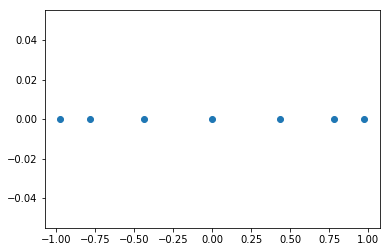

In [5]:
m = 4
r = 3

n = m+r
k = np.arange(1, n+1, dtype=np.float64)

cheb_nodes = np.cos((2*k-1)/(2*n)*np.pi)
plt.plot(cheb_nodes, 0*cheb_nodes, "o")

pts = tuple(cheb_nodes)
print(pts)

AT,G,BT,f = wc.cookToomFilter(pts,m,r)

AT2 = np.array(AT).astype(np.float64)
G2 = np.array(G).astype(np.float64)
BT2 = np.array(BT).astype(np.float64)

In [6]:
d = np.random.random(m+r-1)
g = np.random.random(r)

conv = np.convolve(d,g[::-1])[r-1:1-r]
print(conv)

wconv = np.dot(AT2, np.dot(G2,g) * np.dot(BT2, d))
print(wconv)

[1.32462868 1.11021854 1.08561139 0.94196354]
[1.32462868 1.11021854 1.08561139 0.94196354]


Compare the results the usual case of $0,1,-1,\dots$

In [7]:
def rs(k):
    # produces smallest magn. ints: [1,-1,2,-2,3,...]
    return np.asarray([
        (-1)**i * (i//2 + 1) for i in range(k)
    ])

def rs_zero(k):
    return np.append(0,rs(k)[:-1])

pts = tuple(rs_zero(n))
print(pts)

(0, 1, -1, 2, -2, 3, -3)


In [8]:
AT,G,BT,f = wc.cookToomFilter(pts,m,r)

AT2 = np.array(AT).astype(np.float64)
G2 = np.array(G).astype(np.float64)
BT2 = np.array(BT).astype(np.float64)

In [9]:
conv = np.convolve(d,g[::-1])[r-1:1-r]
wconv = np.dot(AT2, np.dot(G2,g) * np.dot(BT2, d))

print(la.norm(conv - wconv)/la.norm(conv))

1.9755699079151037e-16


### F(6,3)

(0.984807753012208, 0.8660254037844387, 0.6427876096865394, 0.3420201433256688, 6.123233995736766e-17, -0.3420201433256687, -0.6427876096865393, -0.8660254037844387, -0.984807753012208)


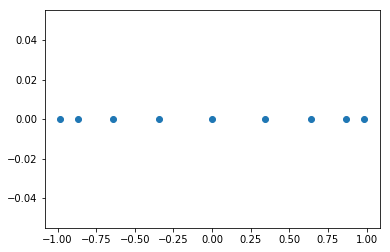

In [10]:
m = 6
r = 3

n = m+r
k = np.arange(1, n+1, dtype=np.float64)

cheb_nodes = np.cos((2*k-1)/(2*n)*np.pi)
plt.plot(cheb_nodes, 0*cheb_nodes, "o")

pts = tuple(cheb_nodes)
print(pts)

AT,G,BT,f = wc.cookToomFilter(pts,m,r)

AT2 = np.array(AT).astype(np.float64)
G2 = np.array(G).astype(np.float64)
BT2 = np.array(BT).astype(np.float64)

In [11]:
d = np.random.random(m+r-1)
g = np.random.random(r)

conv = np.convolve(d,g[::-1])[r-1:1-r]
wconv = np.dot(AT2, np.dot(G2,g) * np.dot(BT2, d))

print(la.norm(conv - wconv)/la.norm(conv))

7.0739131443783035e-15


Integer Points

In [12]:
pts = tuple(rs_zero(n))
print(pts)
AT,G,BT,f = wc.cookToomFilter(pts,m,r)

AT2 = np.array(AT).astype(np.float64)
G2 = np.array(G).astype(np.float64)
BT2 = np.array(BT).astype(np.float64)

(0, 1, -1, 2, -2, 3, -3, 4, -4)


In [13]:
conv = np.convolve(d,g[::-1])[r-1:1-r]
wconv = np.dot(AT2, np.dot(G2,g) * np.dot(BT2, d))

print(la.norm(conv - wconv)/la.norm(conv))

3.6521974911776635e-16


### F(9,9)

First we use Chebyshev Nodes

In [14]:
m = 9
r = 5

n = m+r
k = np.arange(1, n+1, dtype=np.float64)

cheb_nodes = np.cos((2*k-1)/(2*n)*np.pi)

pts = tuple(cheb_nodes)
AT,G,BT,f = wc.cookToomFilter(pts,m,r)

AT2 = np.array(AT).astype(np.float64)
G2 = np.array(G).astype(np.float64)
BT2 = np.array(BT).astype(np.float64)
print(AT2.shape,G2.shape,BT2.shape)

print("A:\n",la.cond(AT2,p=2))
print("B:\n",la.cond(BT2,p=2))
print("G:\n",la.cond(G2,p=2))

(9, 13) (13, 5) (13, 13)
A:
 416.47523940907723
B:
 41471.14467020125
G:
 119.57191874737212


In [15]:
d = np.random.random(m+r-1)
g = np.random.random(r)

conv = np.convolve(d,g[::-1])[r-1:1-r]
wconv = np.dot(AT2, np.dot(G2,g) * np.dot(BT2, d))

print(la.norm(conv - wconv)/la.norm(conv))

4.779090892166832e-12


Integer Points

In [16]:
pts = tuple(rs_zero(n))
print(pts)
AT,G,BT,f = wc.cookToomFilter(pts,m,r)

AT2 = np.array(AT).astype(np.float64)
G2 = np.array(G).astype(np.float64)
BT2 = np.array(BT).astype(np.float64)

print(AT2.shape,G2.shape,BT2.shape)
print("A:\n",la.cond(AT2,p=2))
print("B:\n",la.cond(BT2,p=2))
print("G:\n",la.cond(G2,p=2))

(0, 1, -1, 2, -2, 3, -3, 4, -4, 5, -5, 6, -6, 7)
(9, 13) (13, 5) (13, 13)
A:
 1545520.2908266976
B:
 22748872.77241273
G:
 72752.31206626541


In [17]:
conv = np.convolve(d,g[::-1])[r-1:1-r]
wconv = np.dot(AT2, np.dot(G2,g) * np.dot(BT2, d))

print(la.norm(conv - wconv)/la.norm(conv))

2.1221255581843217e-11


### F(16,12)

Chebyshev Nodes

In [18]:
m = 16
r = 12

n = m+r
k = np.arange(1, n+1, dtype=np.float64)

cheb_nodes = np.cos((2*k-1)/(2*n)*np.pi)

pts = tuple(cheb_nodes)
AT,G,BT,f = wc.cookToomFilter(pts,m,r)

AT2 = np.array(AT).astype(np.float64)
G2 = np.array(G).astype(np.float64)
BT2 = np.array(BT).astype(np.float64)

In [19]:
d = np.random.random(m+r-1)
g = np.random.random(r)

conv = np.convolve(d,g[::-1])[r-1:1-r]
wconv = np.dot(AT2, np.dot(G2,g) * np.dot(BT2, d))

print(la.norm(conv - wconv)/la.norm(conv))

print("\n",conv)
print(wconv)

1.0154527746100513e-05

 [2.41256786 2.51179461 3.0943153  2.76912245 3.24005042 3.1385947  3.03051328 2.78619443 2.98603312 2.94005687 3.2651283  3.65747097 3.54419274 3.22151398 3.02399941 3.28158411]
[2.41255735 2.51182389 3.09435398 2.76916349 3.24009141 3.13863465 3.03055127 2.78623025 2.98606658 2.94008794 3.265157   3.65749739 3.54421707 3.22153635 3.02401989 3.2816018 ]


Integer Points

In [20]:
pts = tuple(rs_zero(n))
AT,G,BT,f = wc.cookToomFilter(pts,m,r)

AT2 = np.array(AT).astype(np.float64)
G2 = np.array(G).astype(np.float64)
BT2 = np.array(BT).astype(np.float64)

/Users/calebju/Code/jupyter/solomonik_convolution/Convolution/winconv.py:19: RuntimeWarning: overflow encountered in long_scalars
  return Matrix(n, 1, lambda i,j: reduce(mul, ((a[i]-a[k] if k!=i else 1) for k in range(0,n)), 1))


In [21]:
conv = np.convolve(d,g[::-1])[r-1:1-r]
wconv = np.dot(AT2, np.dot(G2,g) * np.dot(BT2, d))

print(la.norm(conv - wconv)/la.norm(conv))

print("\n",conv)
print(wconv)

6.821829795723121e+25

 [2.41256786 2.51179461 3.0943153  2.76912245 3.24005042 3.1385947  3.03051328 2.78619443 2.98603312 2.94005687 3.2651283  3.65747097 3.54419274 3.22151398 3.02399941 3.28158411]
[6.59304223e+09 2.32965076e+11 1.34735459e+12 3.98126630e+13 2.62004375e+14 6.70644438e+15 4.90567178e+16 1.11882784e+18 8.93332840e+18 1.85567407e+20 1.59421840e+21 3.06842792e+22 2.80354457e+23
 5.06800909e+24 4.87790230e+25 8.37176384e+26]


### Improved Stability Paper

We'll look at the stability of the matrices mentioned in this [paper](https://openreview.net/pdf?id=H1ZaRZVKg).

In [22]:
def createVMat(pts,b):
    f = pts[0]; g = pts[1]
    a = len(f)
    V = np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            V[i,j] = f[i]**j * g[i]**(b-(j+1))
    return V

In [23]:
pts13_9_nonscaled = np.asarray([
    [0,1,-1,1/2,-1/2,1/3,-1/3,3/2,-3/2,-3,2,-2,1],
    [1,1, 1, 1,   1,  1,   1,  1,   1,  1,1, 1,0]
])

scale = np.asarray([
    -1.333333, \
    0.05, \
    0.1, \
    -0.7314286, \
    -1.024, \
    1.314635, \
    1.643293, \
    -0.005277263, \
    -0.01583179, \
    -1.587302e-05, \
    0.0003265306, \
    0.001632653, \
    1
])

X = np.asarray([
    -0.75, 20, 10, -1.367188, -0.9765625, 0.7606677, 0.6085342, -189.4922, -63.16406, -63000, 3062.5, 612.5, 1
])

SX = np.diag(X)
print(la.norm(SX,ord=2))

Y = np.asarray([
    -1.333333, 0.05, 0.1, -0.7314286, -1.024, 1.314635, 1.643293, -0.005277263, -0.01583179, -1.587302e-05, 0.0003265306, 0.001632653, 1
])

SY = np.diag(Y)
print(la.norm(SY,ord=2))

SW = np.eye(13)
print(la.norm(SW,ord=2))

print(la.norm(SY @ SX @ SW,ord=2))

63000.0
1.643293
1.0
1.0000004047768


In [24]:
V13_13 = createVMat(pts13_9_nonscaled,13)
V13_9 = createVMat(pts13_9_nonscaled,9)
V13_5 = createVMat(pts13_9_nonscaled,5)
print("Y:",la.cond(V13_9,p=2))
print("X:",la.cond(V13_13,p=2))
print("W:",la.cond(V13_5,p=2))

Y: 36278.81950435964
X: 113237687.93141186
W: 63.98474409231298


In [72]:
def winogradMatricesM(p,m,r,inf=True):
    R = len(p)
    assert(r == R-m+1)
    V = np.vander(p,increasing=True)
    V[-1,:] = 0; V[-1,-1] = 1
    C = la.inv(V)
    A = V[:,:r].copy(); A[-1,-1] = 1
    B = V[:,:m].copy(); B[-1,-1] = 1
    return [B.T,A,C.T]
    # return [A,B,C]
    
def chebyMat(n,b):
    # n is number nodes, b is number of basis
    i = np.arange(n, dtype=np.float64)+1
    nodes = np.cos((2*i-1)/(2*n)*np.pi)
    
    basis = np.arange(b, dtype=np.float64)
    
    # (basis,nodes)
    return np.cos(basis * np.arccos(nodes.reshape(-1, 1)))
    
def winogradMatricesC(m,r):
    R = m+r
    RR = 2*R-1
    MC = chebyMat(RR,RR)
    C = la.inv(MC)[-(R-1):,:]*2
    A = chebyMat(RR,R)[:,-r:]
    B = chebyMat(RR,R)[:,-m:]
    return [B.T,A,C.T]
    # return [A,B,C]

In [83]:
(m,r) = (200,200)
f = np.random.random(r)
g = np.random.random(m+r-1)
conv1 = np.convolve(f,g)[r-1:r-1+m]

pts = rs_zero(m+r-1)
[Ct,A,Bt] = winogradMatricesM(pts,m,r)
print(Ct.shape,A.shape,Bt.shape)
print(la.cond(Ct,p=2),la.cond(A,p=2),la.cond(Bt,p=2))
conv2 = np.dot(Ct, np.dot(A,f[::-1])*np.dot(Bt,g) )

print()

[Ct,A,Bt] = winogradMatricesC(m,r)
print(Ct.shape,A.shape,Bt.shape)
print(la.cond(Ct,p=2),la.cond(A,p=2),la.cond(Bt,p=2))
conv3 = np.dot(Ct, np.dot(A,f[::-1])*np.dot(Bt,g) )

print()

print(la.norm(conv1-conv2))
print(la.norm(conv1-conv3))

(200, 399) (399, 200) (399, 399)
1.2841407696222318e+17 3.6658982580782547e+19 1.006298965225273e+27

(200, 799) (799, 200) (799, 399)
1.0000000000011149 1.0000000000011149 1.000000000002953

2.248999766383353e+37
1.2961514845328076e-12
